# Get Visual

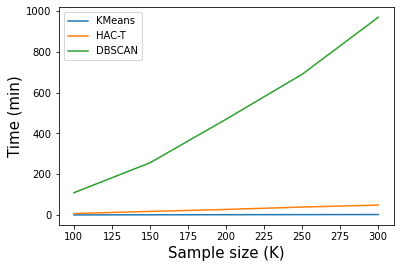

In [18]:
from pylib.tlsh_lib import *
from pylib.hac_lib  import *
from sklearn.cluster import KMeans
from sklearn import metrics
import time

srange = [100,150,200,250,300]
k_time = [0.405621667,0.973116667,1.40553,1.824656667,2.25777]
hact_time = [7.111145,17.67188,27.30981833,38.89396333,48.66350833]
dbs_time = [109.2429267,256.1019417,469.7210583,690.2739433,969.944795]

import matplotlib.pyplot as plt
line1, = plt.plot(srange, k_time,label='KMeans')
line2, = plt.plot(srange, hact_time,label='HAC-T')
line3, = plt.plot(srange, dbs_time,label='DBSCAN')

plt.legend(handles=[line1, line2, line3], loc='upper left')

plt.xlabel('Sample size (K)', fontsize=15)
plt.ylabel('Time (min)', fontsize=15)
plt.show()

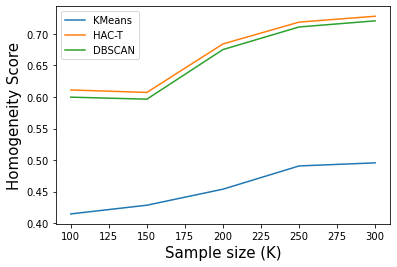

In [19]:
srange = [100,150,200,250,300]

k_sco = [0.4147, 0.4285, 0.4539, 0.4907, 0.4956]
hact_sco = [0.6111, 0.6072, 0.684, 0.7186, 0.7279]
dbs_sco = [0.5997, 0.5965, 0.6751, 0.7109, 0.7206]

line1, = plt.plot(srange, k_sco,label='KMeans')
line2, = plt.plot(srange, hact_sco,label='HAC-T')
line3, = plt.plot(srange, dbs_sco,label='DBSCAN')

plt.legend(handles=[line1, line2, line3], loc='upper left')

plt.xlabel('Sample size (K)', fontsize=15)
plt.ylabel('Homogeneity Score', fontsize=15)
plt.show()

In [20]:
import argparse
import sys
import time

import pandas as pd
from sklearn import metrics
import numpy as np

from pylib.tlsh_lib import *
import warnings
warnings.filterwarnings("ignore")

In [21]:
datafile = "dataDir/mb_1000.csv" #<-----Change this file size
if (datafile == ""):
    print("you must provide a datafile name (-f)\n")
    sys.exit()

tic = time.perf_counter()  # experiment time counter
df = pd.DataFrame() #Result Table

(path, file) = datafile.split("/")  # save file path
(filename, filetype) = file.split(".")  # save file type

(tlist, [labelList, dateList, slist]) = tlsh_csvfile(datafile)  # return (tlshList, [labelList, dateList, ssdeepList])

hashList = tlist

print("Number of samples is " + str(len(hashList)))
print("Number of Unique Label is " + str(len(set(labelList))))
print("Example hash: " + str(hashList[0]))
nlabel = len(set(labelList))
nClusters = [nlabel]

Number of samples is 1000
Number of Unique Label is 63
Example hash: T10263F782BC80EA22C7C01677FE6F518E331567D8E1EA32429D155FA07A8FC1B0D5B786


In [22]:
data = tlist2cdata(hashList)
data

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [23]:
cluster = KMeans(n_clusters=4, random_state=0)
res = cluster.fit(data)
res.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [24]:
a = np.array([[0],[1],[2],[3],[4],[5],[6],[7],[8],[9]])
a

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [25]:
cluster = KMeans(n_clusters=4, random_state=0)
res = cluster.fit(a)
res.labels_

array([2, 2, 2, 3, 3, 0, 0, 0, 1, 1])

In [26]:
X = np.array([[1, 2], [2, 2], [2, 3],[8, 7], [8, 8], [25, 80],[1, 2], [2, 2], [2, 3],[8, 7], [8, 8], [25, 80]])
clustering = DBSCAN(eps=3, min_samples=2).fit(X)
print(clustering.labels_)
print(clustering)

[0 0 0 1 1 2 0 0 0 1 1 2]
DBSCAN(eps=3, min_samples=2)


In [27]:
clustering = KMeans(n_clusters=3, random_state=0).fit(X)
print(clustering.labels_)

[2 2 2 1 1 0 2 2 2 1 1 0]


In [28]:
tptr=[]
tidx = []
idx=0
for x in tlist:
    h1 = tlsh.Tlsh()
    h1.fromTlshStr(x)
    tptr.append(h1)
    elem=[ idx ]
    tidx.append(elem)
    idx += 1

tdata = np.array(tidx)

In [29]:
tptr

In [30]:
tidx

[[0],
 [1],
 [2],
 [3],
 [4],
 [5],
 [6],
 [7],
 [8],
 [9],
 [10],
 [11],
 [12],
 [13],
 [14],
 [15],
 [16],
 [17],
 [18],
 [19],
 [20],
 [21],
 [22],
 [23],
 [24],
 [25],
 [26],
 [27],
 [28],
 [29],
 [30],
 [31],
 [32],
 [33],
 [34],
 [35],
 [36],
 [37],
 [38],
 [39],
 [40],
 [41],
 [42],
 [43],
 [44],
 [45],
 [46],
 [47],
 [48],
 [49],
 [50],
 [51],
 [52],
 [53],
 [54],
 [55],
 [56],
 [57],
 [58],
 [59],
 [60],
 [61],
 [62],
 [63],
 [64],
 [65],
 [66],
 [67],
 [68],
 [69],
 [70],
 [71],
 [72],
 [73],
 [74],
 [75],
 [76],
 [77],
 [78],
 [79],
 [80],
 [81],
 [82],
 [83],
 [84],
 [85],
 [86],
 [87],
 [88],
 [89],
 [90],
 [91],
 [92],
 [93],
 [94],
 [95],
 [96],
 [97],
 [98],
 [99],
 [100],
 [101],
 [102],
 [103],
 [104],
 [105],
 [106],
 [107],
 [108],
 [109],
 [110],
 [111],
 [112],
 [113],
 [114],
 [115],
 [116],
 [117],
 [118],
 [119],
 [120],
 [121],
 [122],
 [123],
 [124],
 [125],
 [126],
 [127],
 [128],
 [129],
 [130],
 [131],
 [132],
 [133],
 [134],
 [135],
 [136],
 [137],
 [138]

In [31]:
tdata

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      